# Практическое задание 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1 Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл

In [2]:
df = pd.read_csv('train.csv')

## 2 Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - 2 балла

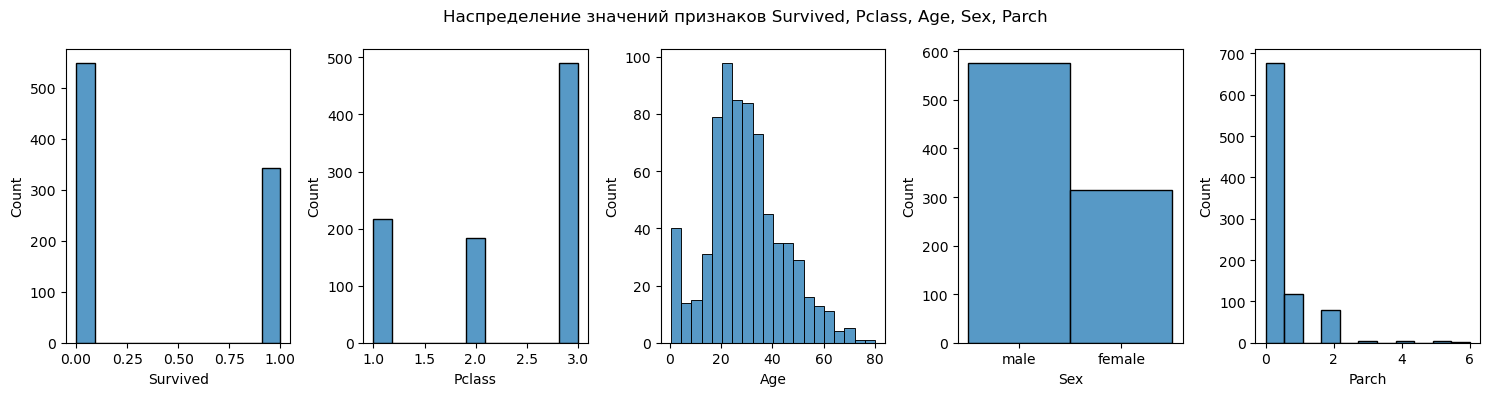

In [3]:
fig, axes = plt.subplots(1,5, figsize = (15,4))

for i, cat in enumerate(['Survived', 'Pclass', 'Age', 'Sex', 'Parch']):
    sns.histplot(ax = axes[i], data = df, x = cat)
plt.suptitle('Hаспределение значений признаков Survived, Pclass, Age, Sex, Parch')
plt.tight_layout()

## 3 Постройте график типа boxplot для столбца Age - 1 балл

Text(0.5, 1.0, 'График типа boxplot для столбца Age')

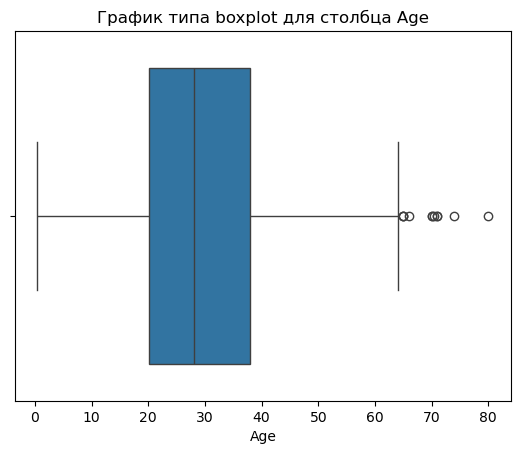

In [4]:
sns.boxplot(data = df, x = 'Age')
plt.title('График типа boxplot для столбца Age')

## 4 Проинтепретируйте полученный график - 1 балл

Средний возраст пассажира корабля 30 лет, половине пассажиров от 20 до 38 лет, самому молодому нет и года, самому старому 80.

## 5 Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах - 1 балл

Text(0.5, 0, 'Pclass')

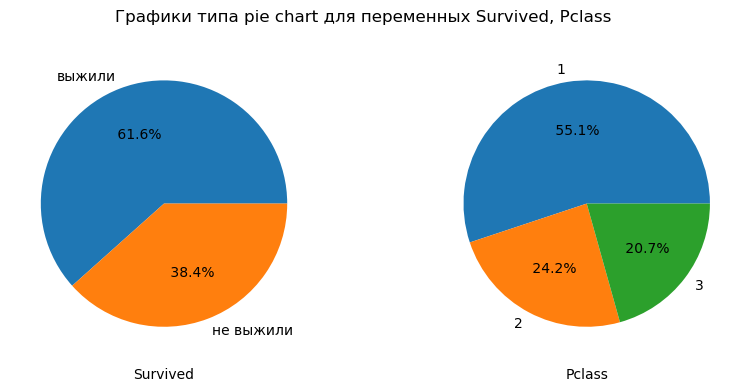

In [5]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
plt.suptitle('Графики типа pie chart для переменных Survived, Pclass')
axes[0].pie(df['Survived'].value_counts().to_list(), labels = ['выжили', 'не выжили'], autopct= ' %1.1f%%')
axes[0].set_xlabel('Survived')
axes[1].pie(df['Pclass'].value_counts().to_list(), labels = ['1', '2', '3'], autopct= ' %1.1f%%')
axes[1].set_xlabel('Pclass')

## 6 Постройте график типа pairplot для всех числовых переменных датасета - 1 балл

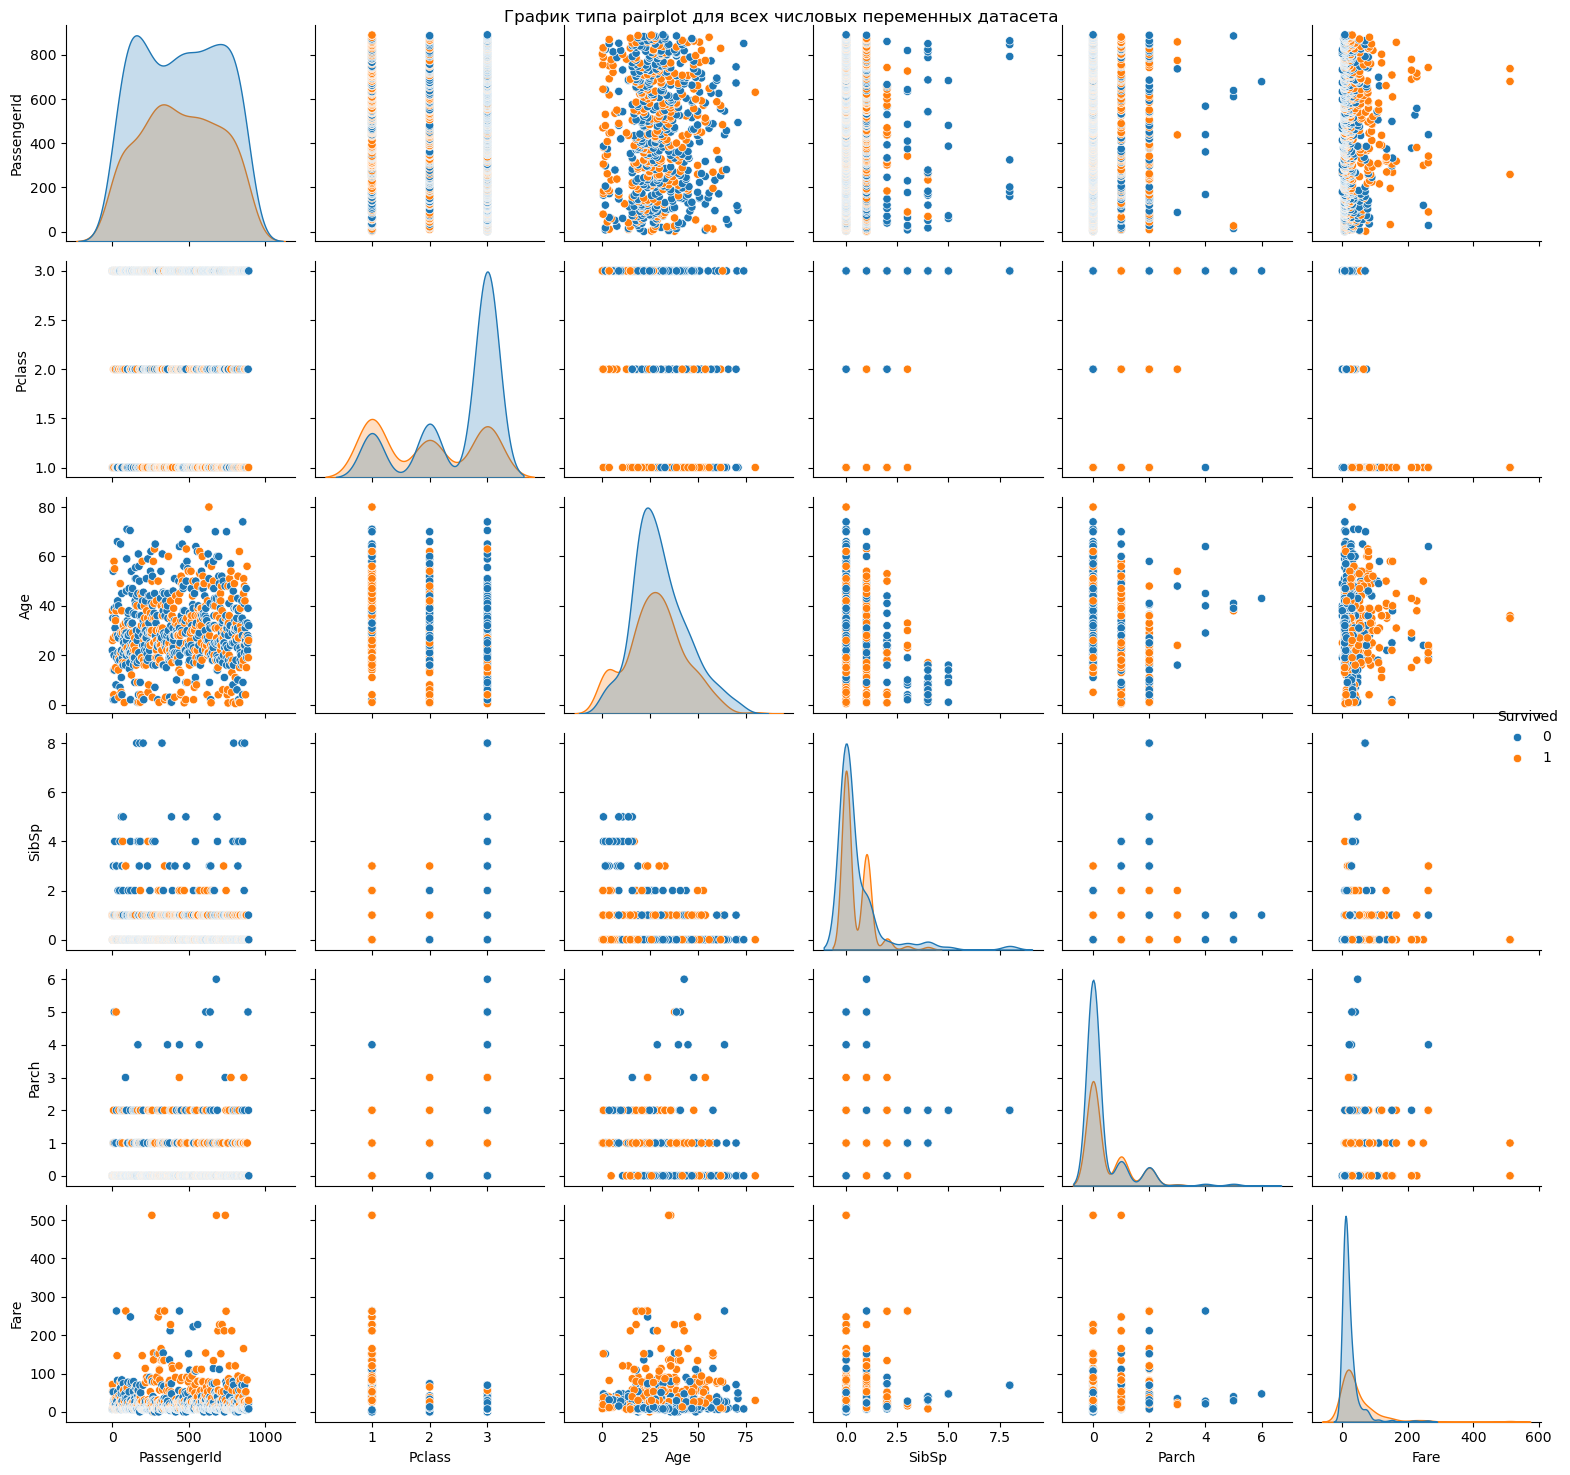

In [6]:
sns.pairplot(df, hue = 'Survived')
plt.suptitle('График типа pairplot для всех числовых переменных датасета')
plt.tight_layout()

## 7 Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - 2 балла

In [9]:

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


In [10]:
l = df.groupby(['Pclass','Sex'])['PassengerId'].count()

In [13]:
data = dict(
    categories = ['Total', '1', '2', '3',
                  'female', 'male', 'female','male', 'female','male'],
    parent = ['', 'Total', 'Total', 'Total', '1', '1', '2', '2', '3', '3'],
    value = [df['PassengerId'].count(), 
             df['Pclass'][df['Pclass'] == 1].count(), 
             df['Pclass'][df['Pclass'] == 2].count(), 
             df['Pclass'][df['Pclass'] == 3].count(), 
             l.iloc[0], l.iloc[1], l.iloc[2], l.iloc[3], l.iloc[4], l.iloc[5]]
)
fig = px.sunburst(data, names='categories', parents = 'parent', values = 'value', branchvalues='total')
fig.show()


## 8 Снабдите все построенные графики наименованиями (title), подписями осей, легендами - 1 балл